In [42]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../src")  
from io_utils import load_csv, save_csv, load_pkl, save_pkl, save_fig

## 1) Load and explore the dataset


In [43]:
# Load the dataset 
# - dowloaded from Kaggle https://www.kaggle.com/datasets/marusagar/bank-transaction-fraud-detection/data
# used chatGPT to alter the dataset to simulate real-world data and cleaning scenarios
file_path = "Bank_Transaction_Fraud1.csv"
df = load_csv(file_path)

In [44]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:")
print(df.columns)

Dataset Shape: (200000, 22)

Columns:
Index(['customer_id', 'customer_name', 'gender', 'age', 'state', 'city',
       'account_type', 'transaction_id', 'transaction_date',
       'transaction_time', 'transaction_amount', 'merchant_id',
       'transaction_type', 'merchant_category', 'account_balance',
       'transaction_device', 'transaction_location', 'is_fraud',
       'transaction_currency', 'customer_contact', 'transaction_description',
       'customer_email'],
      dtype='object')


In [45]:
# Standardize column names: strip + lowercase + underscores
df.columns = (df.columns.str.strip().str.lower().str.replace(r"\s+", "_", regex=True))
print(df.columns)

Index(['customer_id', 'customer_name', 'gender', 'age', 'state', 'city',
       'account_type', 'transaction_id', 'transaction_date',
       'transaction_time', 'transaction_amount', 'merchant_id',
       'transaction_type', 'merchant_category', 'account_balance',
       'transaction_device', 'transaction_location', 'is_fraud',
       'transaction_currency', 'customer_contact', 'transaction_description',
       'customer_email'],
      dtype='object')


In [46]:
# Fraud rate (assuming your label column is named 'is_fraud')
fraud_rate = df["is_fraud"].mean() * 100
print(f"Fraud rate: {fraud_rate:.2f}%")

Fraud rate: 8.07%


In [47]:
# Display the first few rows of the dataset
df.head()

,customer_id,customer_name,gender,age,state,city,account_type,transaction_id,transaction_date,transaction_time,...,transaction_type,merchant_category,account_balance,transaction_device,transaction_location,is_fraud,transaction_currency,customer_contact,transaction_description,customer_email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,16:04:07,...,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,17:14:53,...,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,03:09:52,...,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,12:27:02,...,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,18:30:46,...,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [48]:
# Check data types of columns
print("\nData Types:")
print(df.dtypes)


Data Types:
customer_id                 object
customer_name               object
gender                      object
age                          int64
state                       object
city                        object
account_type                object
transaction_id              object
transaction_date            object
transaction_time            object
transaction_amount         float64
merchant_id                 object
transaction_type            object
merchant_category           object
account_balance            float64
transaction_device          object
transaction_location        object
is_fraud                     int64
transaction_currency        object
customer_contact            object
transaction_description     object
customer_email              object
dtype: object


## 2) Handle missing values

In [49]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nColumns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
city                  10000
transaction_id         2000
transaction_amount     6000
dtype: int64


In [50]:
# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Percentage:")
print(missing_percentage[missing_percentage > 0])


Missing Percentage:
city                  5.0
transaction_id        1.0
transaction_amount    3.0
dtype: float64


In [51]:
# Drop rows with missing transaction_id because they are essential for identifying transactions
print("\nDropping rows with missing transaction_id...")
df = df.dropna(subset=["transaction_id"])


Dropping rows with missing transaction_id...


In [52]:
# Impute missing values for numerical columns via mean
print("\nImputing missing values for transaction_amount...")
df["transaction_amount"] = df["transaction_amount"].fillna(df["transaction_amount"].mean())


Imputing missing values for transaction_amount...


In [53]:
# Dealing with missing values in 'city' column

# Fill missing city with "Unknown"
df["city"] = df["city"].fillna("Unknown")

# Flag rows where transaction_location is missing
df["flag_txnloc_missing"] = df["transaction_location"].str.lower().eq("unknown location")
df["flag_txnloc_missing"] = df["flag_txnloc_missing"].map({True: 1, False: 0}).astype("int64")

# Geo mismatch flag:
# If city/state are not substrings of transaction_location → mismatch
def check_geo_mismatch(row):
    city, state, loc = str(row["city"]).lower(), str(row["state"]).lower(), str(row["transaction_location"]).lower()
    # unknown location → mismatch
    if loc == "unknown location":
        return 1
    if city == "unknown":  
        return 1
    return int((city not in loc) or (state not in loc))

df["flag_geo_mismatch"] = df.apply(check_geo_mismatch, axis=1)
df[df["flag_geo_mismatch"] == 1].head()

,customer_id,customer_name,gender,age,state,city,account_type,transaction_id,transaction_date,transaction_time,...,account_balance,transaction_device,transaction_location,is_fraud,transaction_currency,customer_contact,transaction_description,customer_email,flag_txnloc_missing,flag_geo_mismatch
62,877443fc-042d-479f-a07d-d7bf6b19fd01,Niharika Arora,Male,18,Jharkhand,Unknown,Business,7fe94a25-6ea3-4f64-bbe5-7c25a5f2e7ad,08-01-2025,10:59:22,...,34512.10,Self-service Banking Machine,"Jamshedpur, Jharkhand",0,INR,+9196714XXXXXX,Food subscription,niharikaXXXXX@XXXXX.com,0,1
74,9432aa8a-1829-4728-89b2-73f282fb561f,Jackson Garg,Male,60,Arunachal Pradesh,Unknown,Savings,84edcd46-d09a-4c09-a58c-f4158755482c,18-01-2025,10:40:53,...,13295.58,QR Code Scanner,"Naharlagun, Arunachal Pradesh",0,INR,+9191016XXXXXX,Music concert tickets,jacksonXXXX@XXXXX.com,0,1
82,00db9c1a-75c2-490a-9a85-f0250859d301,Advaith Lad,Male,61,Telangana,Unknown,Checking,20a3a89e-b23e-41a2-a32a-fc1fe516ad91,13-01-2025,08:47:28,...,42438.41,ATM,"Khammam, Telangana",0,INR,+9192046XXXXXX,Hotel booking,advaithXXX@XXXXXXX.com,0,1
108,fd76e913-fd41-47a0-9b81-e5c55f322d59,Om Naik,Male,55,Andhra Pradesh,Unknown,Savings,8281e9d5-3753-44e8-a8b3-fda8b081dff7,15-01-2025,02:06:06,...,17812.59,POS Terminal,"Tirupati, Andhra Pradesh",0,INR,+9197571XXXXXX,Bike rental,omXXXXX@XXXXXXX.com,0,1
136,b6c656c2-018c-4cb6-b34a-cbe51ac6866e,Sneha Ganesan,Female,32,Odisha,Berhampur,Savings,40f54997-3c2e-4786-bada-a7d230f0e908,08-01-2025,21:56:55,...,71079.78,Virtual Card,Unknown Location,1,INR,+9194280XXXXXX,bitcoin_transaction,snehaXXXX@XXXXX.com,1,1


In [54]:
# Recover recoverable missing city values
# If city is "Unknown" but transaction_location is not "Unknown Location", extract city from transaction_location
def extract_city(row):
    city = str(row.get("city", "")).strip()
    state = str(row.get("state", "")).strip()
    loc = row.get("transaction_location", None)

    # Only attempt recovery when city is Unknown
    if city.lower() != "unknown":
        return city

    # If location is missing/unknown or not in "City, State" format → keep Unknown
    loc_str = str(loc).strip()
    if loc_str.lower() == "unknown location" or "," not in loc_str:
        return city

    # Parse "City, State"
    txn_city, txn_state = [p.strip() for p in loc_str.split(",", 1)]

    # *** Recover only if states match!
    if state.lower() == txn_state.lower() and txn_city:
        return txn_city

    # Otherwise keep Unknown
    return city

# Apply
df["city"] = df.apply(extract_city, axis=1)

# Quick summary
recovered = (df["city"].str.lower() != "unknown").sum()
print(f"Cities not 'Unknown' after recovery: {recovered}")
print("Remaining 'Unknown' cities:", (df["city"].str.lower() == "unknown").sum())

Cities not 'Unknown' after recovery: 197801
Remaining 'Unknown' cities: 199


In [55]:
# Verify that there are no more missing values
missing_values = df.isnull().sum()
print("\nColumns with missing values after cleaning:")
print(missing_values[missing_values > 0])


Columns with missing values after cleaning:
Series([], dtype: int64)


## 3) Timestamp conversion
- parse to datetime, create useful subcomponents day of week, hour

In [56]:
# Converting the transaction_date and transaction_time columns into a single datetime format

# Combine date + time into one string
df["transaction_timestamp"] = df["transaction_date"].astype(str) + " " + df["transaction_time"].astype(str)
print ("Data type before conversion:", df ["transaction_timestamp"].dtypes)
print("Example: ", df["transaction_timestamp"][0])


Data type before conversion: object
Example:  23-01-2025 16:04:07


In [57]:
# Convert to datetime format
df["transaction_timestamp"] = pd.to_datetime(
    df["transaction_timestamp"], format="%d-%m-%Y %H:%M:%S", errors="coerce")

# Verify the changes
print("Data type after conversion:", df["transaction_timestamp"].dtypes)
df.head()

Data type after conversion: datetime64[ns]


,customer_id,customer_name,gender,age,state,city,account_type,transaction_id,transaction_date,transaction_time,...,transaction_device,transaction_location,is_fraud,transaction_currency,customer_contact,transaction_description,customer_email,flag_txnloc_missing,flag_geo_mismatch,transaction_timestamp
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,16:04:07,...,Voice Assistant,"Thiruvananthapuram, Kerala",0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com,0,0,2025-01-23 16:04:07
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,17:14:53,...,POS Mobile Device,"Nashik, Maharashtra",0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com,0,0,2025-01-11 17:14:53
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,03:09:52,...,ATM,"Bhagalpur, Bihar",0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com,0,0,2025-01-25 03:09:52
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,12:27:02,...,POS Mobile App,"Chennai, Tamil Nadu",0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com,0,0,2025-01-19 12:27:02
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,18:30:46,...,Virtual Card,"Amritsar, Punjab",0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com,0,0,2025-01-30 18:30:46


In [58]:
# Check for any conversion errors
conversion_errors = df["transaction_timestamp"].isna().sum()
conversion_errors_pc = (conversion_errors / len(df)) * 100
if conversion_errors_pc > 10:
    print("WARNING: Many datetimes did not convert properly. Investigate formatting issues.")
else:
    print(f"Conversion errors in {conversion_errors_pc:.1%} of the data")

Conversion errors in 0.0% of the data


In [59]:
# Drop old columns because they are redundant
df = df.drop(columns=["transaction_date", "transaction_time"], errors = "ignore")

# Extract time-based features
df["day_of_week"] = df["transaction_timestamp"].dt.day_of_week
df["hour"] = df["transaction_timestamp"].dt.hour

# Double check new formatting
print(df[["transaction_timestamp", "day_of_week", "hour"]].head())

  transaction_timestamp  day_of_week  hour
0   2025-01-23 16:04:07            3    16
1   2025-01-11 17:14:53            5    17
2   2025-01-25 03:09:52            5     3
3   2025-01-19 12:27:02            6    12
4   2025-01-30 18:30:46            3    18


## 4) Dropping known redundant or unnecessary columns to clean up dataframe

In [60]:
#dropping redundant transaction_location column
df = df.drop(columns=["transaction_location"], errors="ignore")

In [61]:
# Remove the personal identifying information (PII) columns for both legal compliance purposes and model relevance
df = df.drop(columns=["customer_name", "customer_email", "customer_contact"], errors="ignore")
df.head()

,customer_id,gender,age,state,city,account_type,transaction_id,transaction_amount,merchant_id,transaction_type,...,account_balance,transaction_device,is_fraud,transaction_currency,transaction_description,flag_txnloc_missing,flag_geo_mismatch,transaction_timestamp,day_of_week,hour
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Male,60,Kerala,Thiruvananthapuram,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,49554.574641,214e03c5-5c34-40d1-a66c-f440aa2bbd02,Transfer,...,74557.27,Voice Assistant,0,INR,Bitcoin transaction,0,0,2025-01-23 16:04:07,3,16
1,7c14ad51-781a-4db9-b7bd-67439c175262,Female,51,Maharashtra,Nashik,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,43622.600000,f9e3f11f-28d3-4199-b0ca-f225a155ede6,Bill Payment,...,74622.66,POS Mobile Device,0,INR,Grocery delivery,0,0,2025-01-11 17:14:53,5,17
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Male,20,Bihar,Bhagalpur,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,63062.560000,97977d83-5486-4510-af1c-8dada3e1cfa0,Bill Payment,...,66817.99,ATM,0,INR,Mutual fund investment,0,0,2025-01-25 03:09:52,5,3
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Female,57,Tamil Nadu,Chennai,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,14000.720000,f45cd6b3-5092-44d0-8afb-490894605184,Debit,...,58177.08,POS Mobile App,0,INR,Food delivery,0,0,2025-01-19 12:27:02,6,12
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Female,43,Punjab,Amritsar,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,18335.160000,70dd77dd-3b00-4b2c-8ebc-cfb8af5f6741,Transfer,...,16108.56,Virtual Card,0,INR,Debt repayment,0,0,2025-01-30 18:30:46,3,18


In [62]:
# Check for multiple types of currency used in transactions.  If multiple currencies, we will convert to one common currency
print("\nUnique currencies in transaction_currency column:")
print(df["transaction_currency"].value_counts())


Unique currencies in transaction_currency column:
transaction_currency
INR    198000
Name: count, dtype: int64


In [63]:
# Drop transaction currency column because all transactions are in INR so currency column is not useful for the model
df = df.drop(columns=["transaction_currency"], errors="ignore")

# 5) Exploratory Visualizations


Figure saved: /Users/emilyoor/Documents/Code/Portfolio_Project1_financialtransactions/Reports/figures/fraud_dist.png


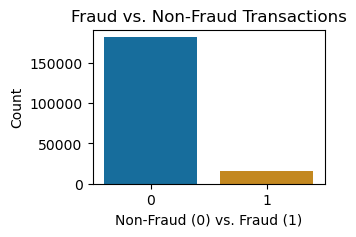

In [64]:
# Visualize fruad distribution with a barplot
plt.figure(figsize=(3, 2))
sns.countplot(x="is_fraud", data=df, hue="is_fraud",palette="colorblind", legend=False)
plt.title("Fraud vs. Non-Fraud Transactions")
plt.xlabel("Non-Fraud (0) vs. Fraud (1)")
plt.ylabel("Count")
plt.draw()
# Save explicitly
save_fig(plt, "fraud_dist.png")

In [65]:
save_fig(plt, "fraud_distribution.png")

Figure saved: /Users/emilyoor/Documents/Code/Portfolio_Project1_financialtransactions/Reports/figures/fraud_distribution.png


<Figure size 640x480 with 0 Axes>

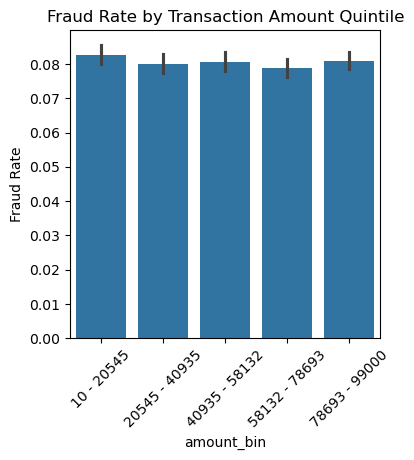

In [66]:
#Look at how fraud rates differ by transaction amount
df["amount_bin"] = pd.qcut(df["transaction_amount"], q=5, duplicates="drop").apply(lambda x: f"{int(round(x.left))} - {int(round(x.right))}")

plt.figure(figsize=(4,4))
sns.barplot(x="amount_bin", y="is_fraud", data=df, estimator=lambda x: sum(x)/len(x))
plt.xticks(rotation=45)
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Transaction Amount Quintile")
plt.draw()

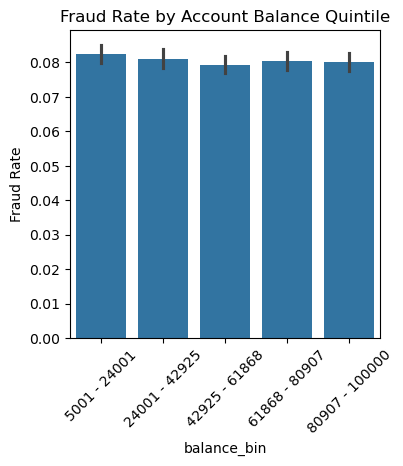

In [67]:
# Look at how fraud rates differ by account balance
# Create bins for account balance
df["balance_bin"] = pd.qcut(df["account_balance"], q=5, duplicates="drop").apply(lambda x: f"{int(round(x.left))} - {int(round(x.right))}")

plt.figure(figsize=(4,4))
sns.barplot(x="balance_bin", y="is_fraud", data=df, estimator=lambda x: sum(x)/len(x))
plt.xticks(rotation=45)
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Account Balance Quintile")
plt.draw()

- Neither transaction amount nor account balance alone strongly separates fraud from non-fraud

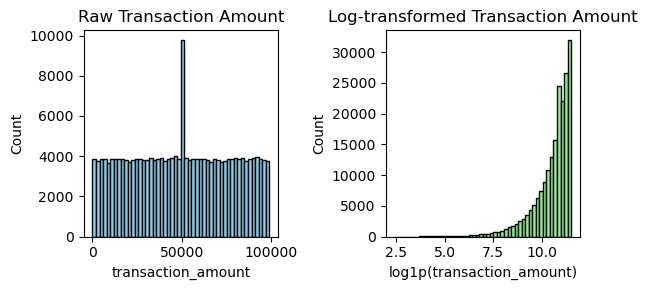

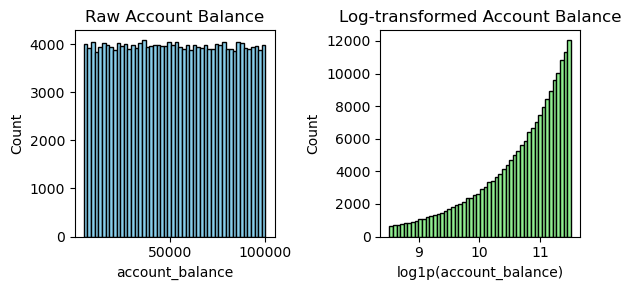

In [68]:
# Check the shape of the transaction amount and account balance distributions to see if log transformation is needed
# Transaction Amount
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Raw
axes[0].hist(df["transaction_amount"], bins=50, color="skyblue", edgecolor="black")
axes[0].set_title("Raw Transaction Amount")
axes[0].set_xlabel("transaction_amount")
axes[0].set_ylabel("Count")

# Log-transformed (log1p handles zeros safely)
df["transaction_amount_log"] = np.log1p(df["transaction_amount"])
axes[1].hist(df["transaction_amount_log"], bins=50, color="lightgreen", edgecolor="black")
axes[1].set_title("Log-transformed Transaction Amount")
axes[1].set_xlabel("log1p(transaction_amount)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.draw()


# Account Balance
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Raw
axes[0].hist(df["account_balance"], bins=50, color="skyblue", edgecolor="black")
axes[0].set_title("Raw Account Balance")
axes[0].set_xlabel("account_balance")
axes[0].set_ylabel("Count")

# Log-transformed
df["account_balance_log"] = np.log1p(df["account_balance"])
axes[1].hist(df["account_balance_log"], bins=50, color="lightgreen", edgecolor="black")
axes[1].set_title("Log-transformed Account Balance")
axes[1].set_xlabel("log1p(account_balance)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.draw()

- log transform not needed

In [69]:
# Drop the log transformed transaction_amount and log transformed account_balance columns
# also drop bin columns
df = df.drop(columns=["transaction_amount_log", "account_balance_log", "balance_bin", "amount_bin"], errors="ignore")

In [70]:
# Exploring some of the categorical variables

#creating a reusable function to plot fraud rate by categorical variable
def plot_fraud_rate(df, col, sort=True, top_n=None, palette="colorblind"):
    """
    Plot fraud rate by a categorical variable.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Your dataset containing the fraud label.
    col : str
        The column name (categorical variable).
    sort : bool, default=True
        Sort categories by fraud rate (descending).
    top_n : int or None, default=None
        If given, only show top_n categories (after sorting).
    palette : str, default="colorblind"
        Seaborn color palette.
    """
    
    # Compute fraud rate
    fraud_rate = df.groupby(col)["is_fraud"].mean().reset_index()
    
    # Sorting
    if sort:
        fraud_rate = fraud_rate.sort_values("is_fraud", ascending=False)
    
    # Limit number of categories
    if top_n is not None and top_n < len(fraud_rate):
        fraud_rate = fraud_rate.head(top_n)
    
    # Dynamic width scaling
    n_cats = fraud_rate[col].nunique()
    width = max(3, n_cats/2)  
    
    # Plot
    plt.figure(figsize=(width, 6))
    ax = sns.barplot(x=col, y="is_fraud", hue=col, data=fraud_rate, palette=palette, legend=False)
    
    plt.title(f"Fraud Rate by {col}")
    plt.ylabel("Fraud Rate")
    plt.xticks(rotation=45, ha="right")
    plt.subplots_adjust(bottom=0.5)
    
    plt.draw()

Figure saved: /Users/emilyoor/Documents/Code/Portfolio_Project1_financialtransactions/Reports/figures/fraud_rate_by_geo_mismatch.png
Figure saved: /Users/emilyoor/Documents/Code/Portfolio_Project1_financialtransactions/Reports/figures/fraud_rate_by_txnloc_missing.png
Figure saved: /Users/emilyoor/Documents/Code/Portfolio_Project1_financialtransactions/Reports/figures/fraud_rate_by_device.png
Figure saved: /Users/emilyoor/Documents/Code/Portfolio_Project1_financialtransactions/Reports/figures/fraud_rate_by_transaction_type.png
Figure saved: /Users/emilyoor/Documents/Code/Portfolio_Project1_financialtransactions/Reports/figures/fraud_rate_by_transaction_description.png


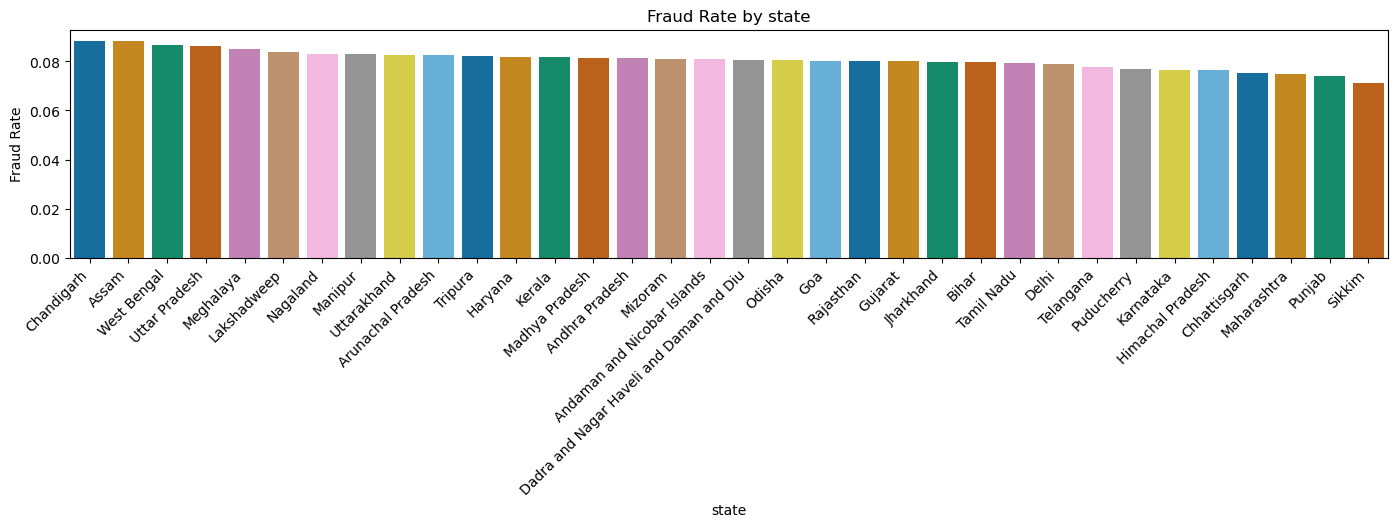

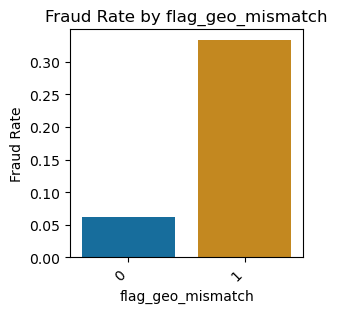

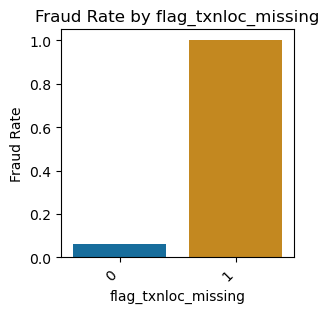

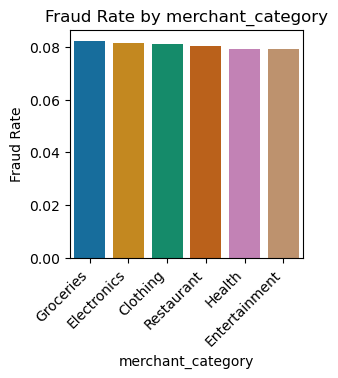

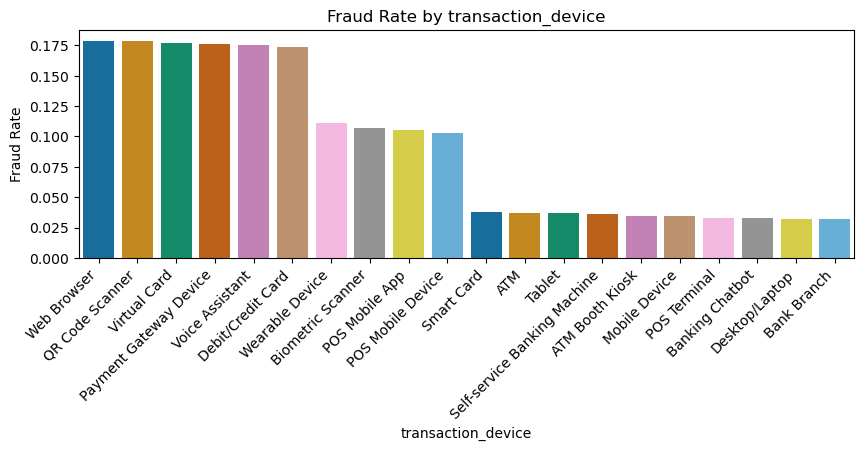

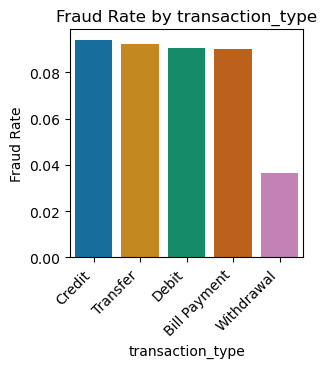

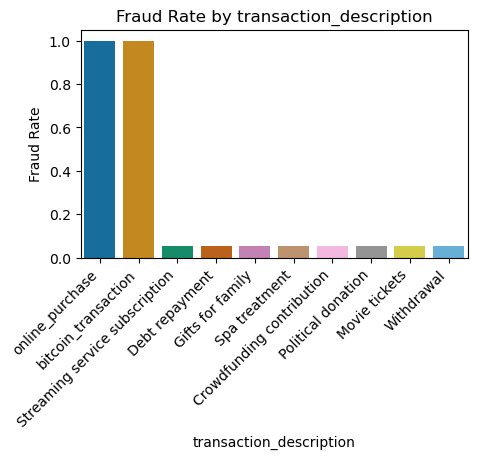

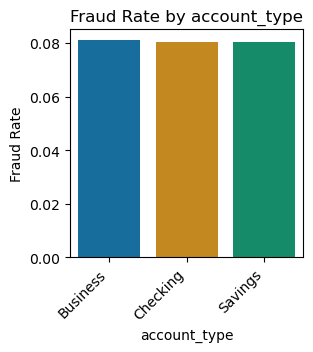

In [71]:
# Saved images with possibly interesting patterns

# Plot fraud rate by state
plot_fraud_rate(df, "state")

# Plot fraud rate by geo mismatch flag
plot_fraud_rate(df, "flag_geo_mismatch")
save_fig(plt, "fraud_rate_by_geo_mismatch.png")

# Plot fraud rate by transaction location missing flag
plot_fraud_rate(df, "flag_txnloc_missing")
save_fig(plt, "fraud_rate_by_txnloc_missing.png")

# Plot fraud rate by merchant category
plot_fraud_rate(df, "merchant_category")

# Plot fraud rate by device
plot_fraud_rate(df, "transaction_device")
save_fig(plt, "fraud_rate_by_device.png")

# Plot fraud rate by device
plot_fraud_rate(df, "transaction_type")
save_fig(plt, "fraud_rate_by_transaction_type.png")

# Plot fraud rate by transaction description
plot_fraud_rate(df, "transaction_description", top_n=10) 
save_fig(plt, "fraud_rate_by_transaction_description.png")

# Plot fraud rate by account type
plot_fraud_rate(df, "account_type")

## 6) Correlation analysis
- Checking the correlation between numeric features and the target variable 'is_fraud'

Figure saved: /Users/emilyoor/Documents/Code/Portfolio_Project1_financialtransactions/Reports/figures/correlation_heatmap.png
Top correlations with 'is_fraud':
is_fraud               1.000000
flag_txnloc_missing    0.484268
flag_geo_mismatch      0.252280
day_of_week            0.001409
age                   -0.000522
transaction_amount    -0.002157
hour                  -0.002832
account_balance       -0.003051
Name: is_fraud, dtype: float64


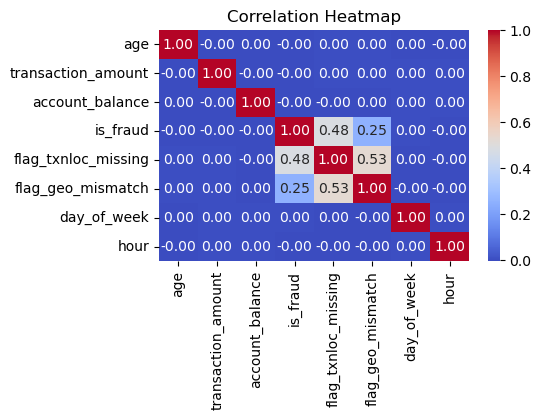

In [72]:
# Correlation heatmap (numeric columns only)
plt.figure(figsize=(5, 3))
numeric_columns = df.select_dtypes(include=["number"])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.draw()
save_fig(plt, "correlation_heatmap.png")

# Identify top correlations with 'is_fraud'
is_fraud_correlations = correlation_matrix["is_fraud"].sort_values(ascending=False)
print("Top correlations with 'is_fraud':")
print(is_fraud_correlations)

## 7) Identify Outliers
- this dataset contains 0 outliers, but checking anyway

In [73]:
# Creating a function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [74]:
# Detect outliers in the 'amount' column
outliers = detect_outliers_iqr(df, "transaction_amount")
print(f"Number of outliers in 'amount': {len(outliers)}")


Number of outliers in 'amount': 0


In [75]:
# Detect outliers in the 'account balance' column
outliers = detect_outliers_iqr(df, "account_balance")
print(f"Number of outliers in 'account_balance': {len(outliers)}")

Number of outliers in 'account_balance': 0


## 8) Feature Engineering
- creating a ratio between the transaction amount and the balance of the account to see if combining variables is any more predictive of fraud vs non-fraud

In [76]:
# txn_to_balance_ratio
denom = df["account_balance"].replace(0, np.nan)  # avoid division by zero
df["txn_to_balance_ratio"] = df["transaction_amount"] / denom

#replace inf/NaN (from 0 or missing account balance) with 0;
df["txn_to_balance_ratio"] = df["txn_to_balance_ratio"].replace([np.inf, -np.inf], np.nan).fillna(0.0)

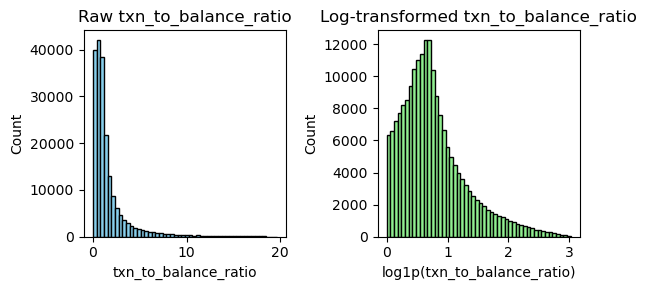

In [77]:
# check the shape of the ratio distributions
# Plot histograms for raw and log-transformed versions
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Raw ratio
axes[0].hist(df["txn_to_balance_ratio"], bins=50, color="skyblue", edgecolor="black")
axes[0].set_title("Raw txn_to_balance_ratio")
axes[0].set_xlabel("txn_to_balance_ratio")
axes[0].set_ylabel("Count")


# Log-transformed ratio (log1p handles zeros safely)
df["txn_to_balance_ratio_log"] = np.log1p(df["txn_to_balance_ratio"])
axes[1].hist(df["txn_to_balance_ratio_log"], bins=50, color="lightgreen", edgecolor="black")
axes[1].set_title("Log-transformed txn_to_balance_ratio")
axes[1].set_xlabel("log1p(txn_to_balance_ratio)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.draw()

# plots show that we should use the log transformed version for scaling and the model

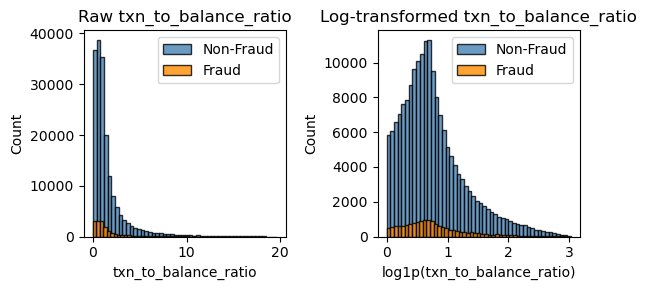

In [78]:
# see if log transformation make fraud vs non-fraud seperation clearer
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Raw ratio
axes[0].hist(df.loc[df["is_fraud"] == 0, "txn_to_balance_ratio"], bins=50, alpha=0.8, label="Non-Fraud", color="steelblue", edgecolor="black")
axes[0].hist(df.loc[df["is_fraud"] == 1, "txn_to_balance_ratio"], bins=50, alpha=0.8, label="Fraud", color="darkorange", edgecolor="black")
axes[0].set_title("Raw txn_to_balance_ratio")
axes[0].set_xlabel("txn_to_balance_ratio")
axes[0].set_ylabel("Count")
axes[0].legend()

# Log-transformed ratio
axes[1].hist(df.loc[df["is_fraud"] == 0, "txn_to_balance_ratio_log"], bins=50, alpha=0.8, label="Non-Fraud", color="steelblue", edgecolor="black")
axes[1].hist(df.loc[df["is_fraud"] == 1, "txn_to_balance_ratio_log"], bins=50, alpha=0.8, label="Fraud", color="darkorange", edgecolor="black")
axes[1].set_title("Log-transformed txn_to_balance_ratio")
axes[1].set_xlabel("log1p(txn_to_balance_ratio)")
axes[1].set_ylabel("Count")
axes[1].legend()

plt.tight_layout()
plt.draw()

# While fraud/non-fraud overlap is still high, the transformation improved feature scaling for models sensitive to skew (e.g., logistic regression).
#dropping the original txn_to_balance_ratio column because we will use the log transformed version for scaling and the model
df = df.drop(columns=["txn_to_balance_ratio"], errors="ignore")

In [79]:
# Count how many transactions per customer and how many transactions per merchant to see if we should engineer behavioral features to contribute to the model
# for example, number of transactions per customer, number of transactions per merchant, etc.

cust_counts = df["customer_id"].value_counts()

print("Unique customers:", cust_counts.shape[0])
print("Customers with >1 transaction:", (cust_counts > 1).sum())
print("Max transactions for a single customer:", cust_counts.max())

merch_counts = df["merchant_id"].value_counts()

print("Unique merchants:", merch_counts.shape[0])
print("Merchants with >1 transaction:", (merch_counts > 1).sum())
print("Max transactions for a single merchant:", merch_counts.max())

# with this dataset, these descriptive engineered features aren't necessary because there is no history to build on, 
# but it is good to check the data for future reference

Unique customers: 198000
Customers with >1 transaction: 0
Max transactions for a single customer: 1
Unique merchants: 198000
Merchants with >1 transaction: 0
Max transactions for a single merchant: 1


In [80]:
# Dropping columns that are not useful for the model or engineering new feautures in this dataset 
# --> based on plots, keeping 'transaction_type', 'transaction_device' for target encoding later
df = df.drop(columns=["customer_id", "transaction_id", "merchant_id"], errors="ignore")

## 9) Cyclical encoding of hour and day_of_week variables

In [81]:
# Cyclical encoding for day_of_week
df["dow_sin"] = np.sin(2 * np.pi * df["day_of_week"] / 7)
df["dow_cos"] = np.cos(2 * np.pi * df["day_of_week"] / 7)

# Cyclical encoding for hour
df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)

#dropping day_of_week, hour and timestamp columns because we have now encoded them cyclically
df = df.drop(columns=["day_of_week", "hour", "transaction_timestamp"], errors="ignore")

# 10) Saving the cleaned dataframe
- saving as both csv and pkl file types

In [82]:
save_csv(df, "df_cleaned.csv")
save_pkl(df, "df_cleaned.pkl")

Saved: /Users/emilyoor/Documents/Code/Portfolio_Project1_financialtransactions/Data/processed/df_cleaned.csv
Pickle saved: /Users/emilyoor/Documents/Code/Portfolio_Project1_financialtransactions/Data/processed/df_cleaned.pkl
